# Exploring the Big-Vul dataset
This notebook was used for the intial exploration of the [Big-Vul dataset](https://github.com/ZeoVan/MSR_20_Code_vulnerability_CSV_Dataset).

### Imports and loading the dataset
First, import the necessary libraries for parsing and visualising the data, and preprocess the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv("data/MSR_data_cleaned.csv")

# Preprocessing
df["Score"] = pd.to_numeric(df["Score"], errors="coerce")
df["CWE ID"] = df["CWE ID"].astype(str)
df["Complexity"] = df["Complexity"].fillna("Unknown")
df["Availability"] = df["Availability"].fillna("None")
df["Integrity"] = df["Integrity"].fillna("None")
df["Confidentiality"] = df["Confidentiality"].fillna("None")

: 

In [ ]:
# print all columns in the df
print("Columns in the df:", df.columns.tolist())

# Total number of entries
total_entries = len(df)
print(f"Total number of entries: {total_entries}")

# Total number of vulnerable entries (if vul  == 1)
total_vulnerable = df[df["vul"] == 1].shape[0]
print(f"Total number of vulnerable entries: {total_vulnerable}")

# % Percentage of vulnerable entries
vul_percentage = (total_vulnerable / total_entries) * 100
print(f"Percentage of vulnerable entries: {vul_percentage:.2f}%")

Columns in the df: ['Unnamed: 0', 'Access Gained', 'Attack Origin', 'Authentication Required', 'Availability', 'CVE ID', 'CVE Page', 'CWE ID', 'Complexity', 'Confidentiality', 'Integrity', 'Known Exploits', 'Publish Date', 'Score', 'Summary', 'Update Date', 'Vulnerability Classification', 'add_lines', 'codeLink', 'commit_id', 'commit_message', 'del_lines', 'file_name', 'files_changed', 'func_after', 'func_before', 'lang', 'lines_after', 'lines_before', 'parentID', 'patch', 'project', 'project_after', 'project_before', 'vul', 'vul_func_with_fix']
Total number of entries: 188636
Total number of vulnerable entries: 10900
Percentage of vulnerable entries: 5.78%


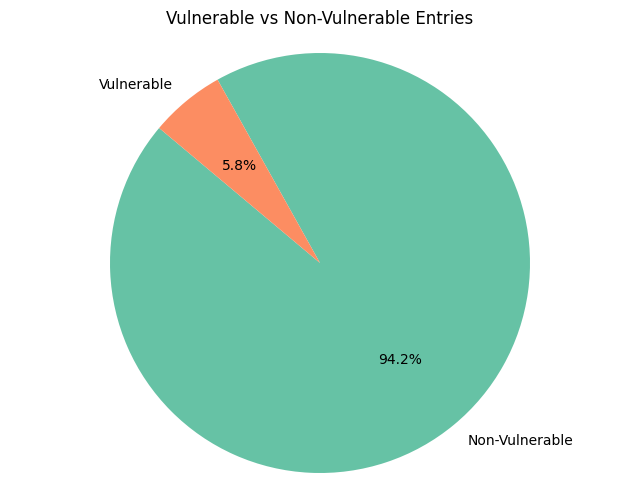

In [ ]:
# Pie chart of vulnerable vs non-vulnerable entries
vul_counts = df["vul"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(vul_counts, labels=["Non-Vulnerable", "Vulnerable"],
        autopct="%1.1f%%", startangle=140, colors=["#66c2a5", "#fc8d62"])
plt.title("Vulnerable vs Non-Vulnerable Entries")
plt.axis("equal")
plt.show()

### Statistics

In [ ]:
code_lengths = df['func_before'].apply(len)
line_counts = df['func_before'].apply(lambda x: len(x.splitlines()))

num_total = len(df)
num_unique_commits = df['commit_id'].nunique()

print(f"Unique commit_ids: {num_unique_commits} ({num_unique_commits / num_total:.4%})")
print(f"Average code length (characters): {code_lengths.mean():.4f}")
print(f"Average number of lines: {line_counts.mean():.4f}")

Unique commit_ids: 4058 (2.1512%)
Average code length (characters): 910.4374
Average number of lines: 29.9341


### Visualisations

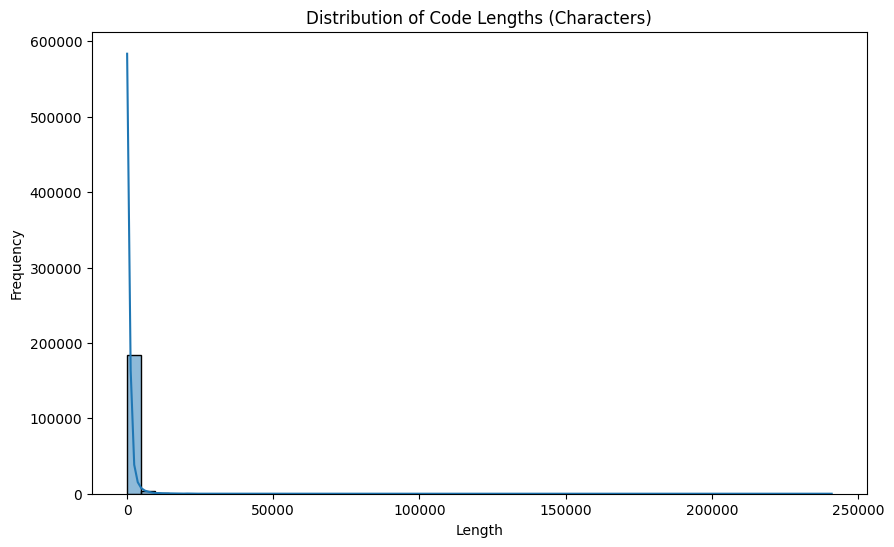

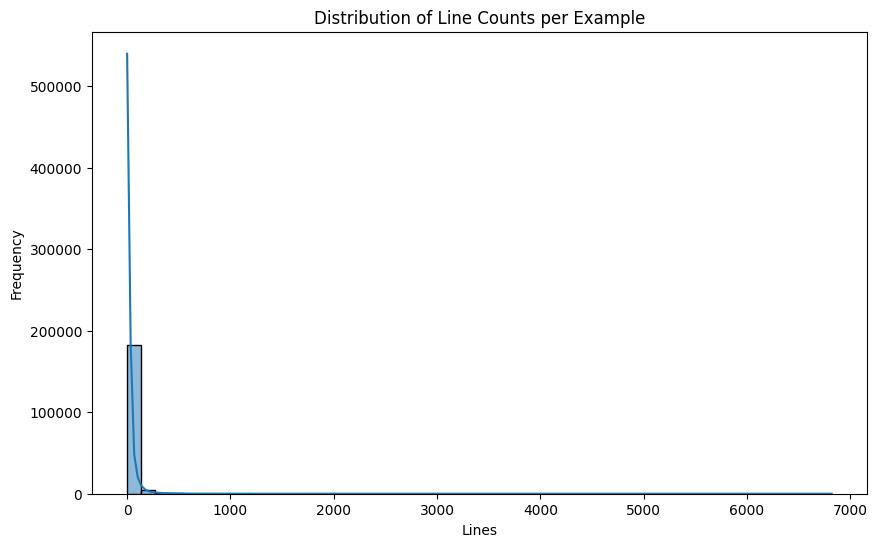

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(code_lengths, bins=50, kde=True)
plt.title("Distribution of Code Lengths (Characters)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(line_counts, bins=50, kde=True)
plt.title("Distribution of Line Counts per Example")
plt.xlabel("Lines")
plt.ylabel("Frequency")
plt.show()

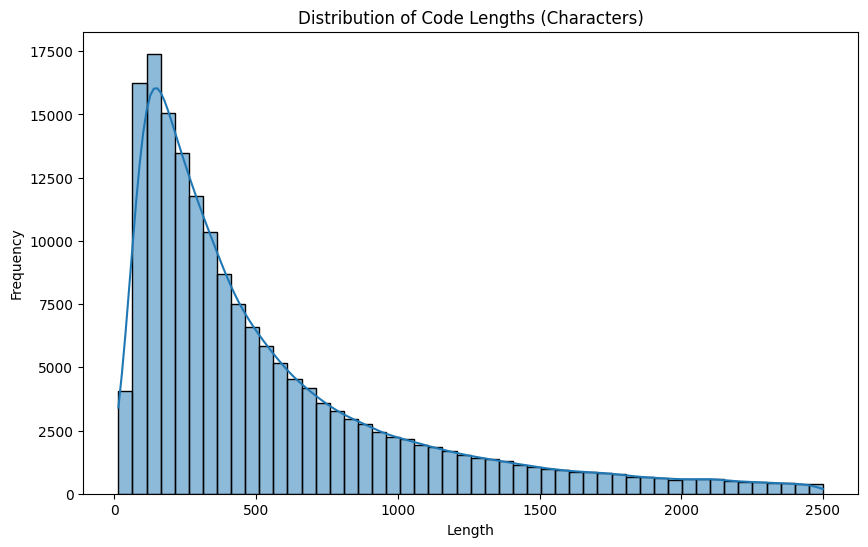

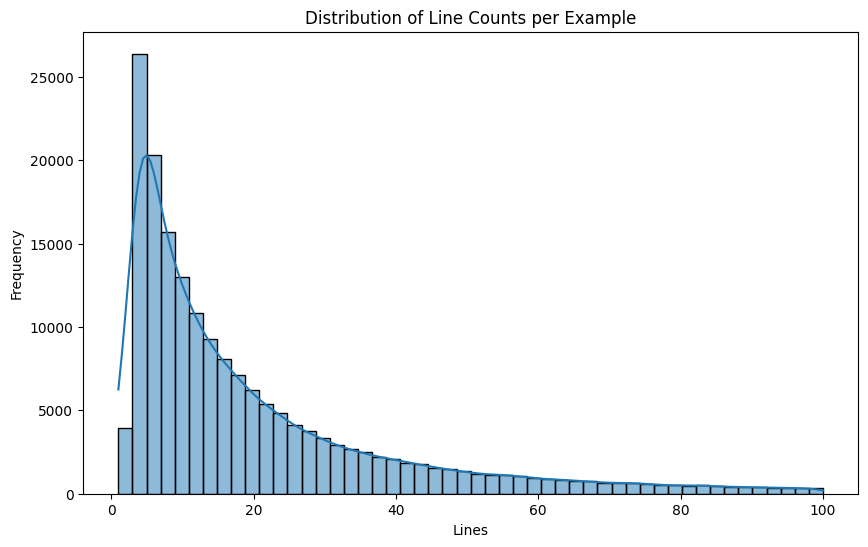

In [ ]:
filtered_code_lengths = [l for l in code_lengths if l <= 2500]
filtered_line_counts = [l for l in line_counts if l <= 100]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_code_lengths, bins=50, kde=True)
plt.title("Distribution of Code Lengths (Characters)")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_line_counts, bins=50, kde=True)
plt.title("Distribution of Line Counts per Example")
plt.xlabel("Lines")
plt.ylabel("Frequency")
plt.show()

In [ ]:
below_2500 = df['func_before'].str.len() < 2500
percentage = below_2500.mean() * 100
print(f"Percentage of entries with code length < 2500: {percentage:.2f}%")

Percentage of entries with code length < 2500: 93.30%


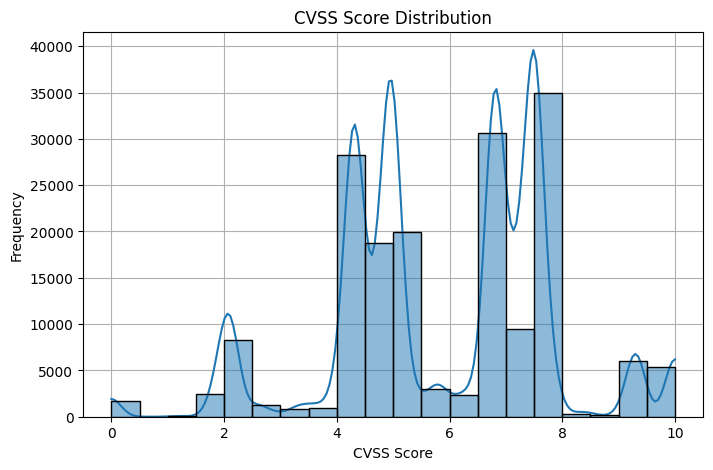

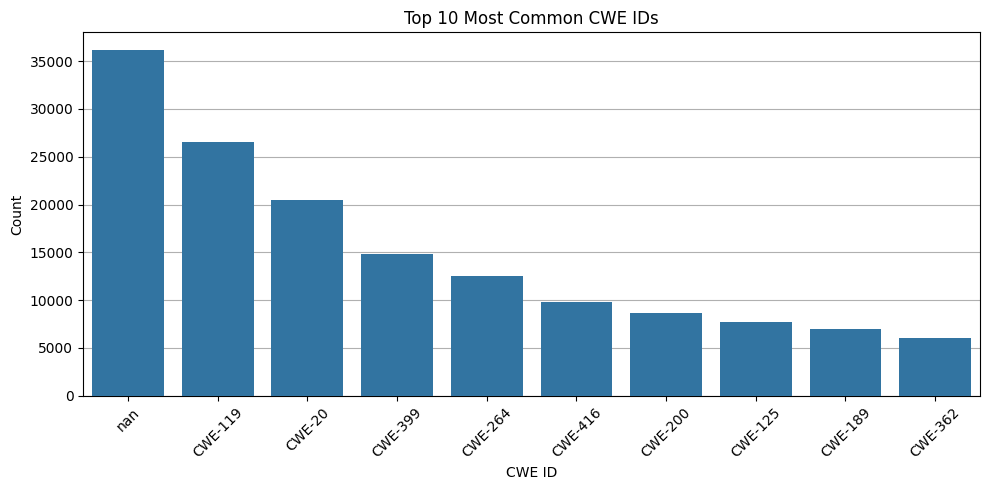

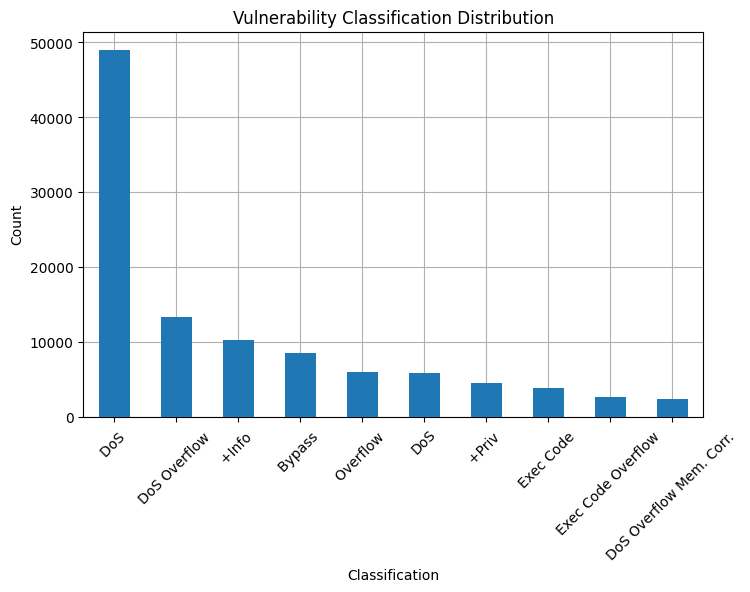

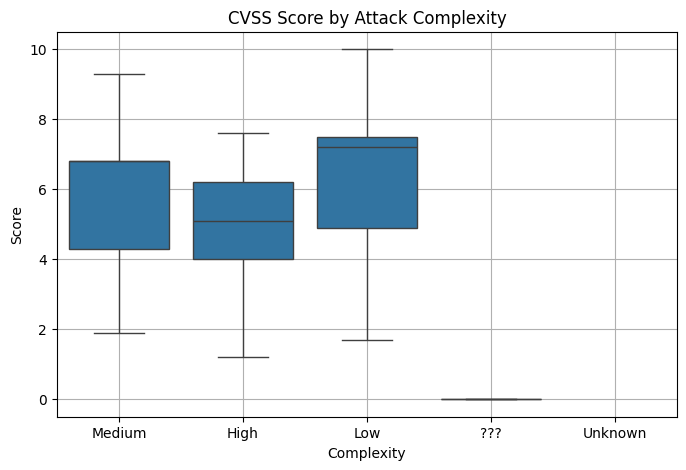

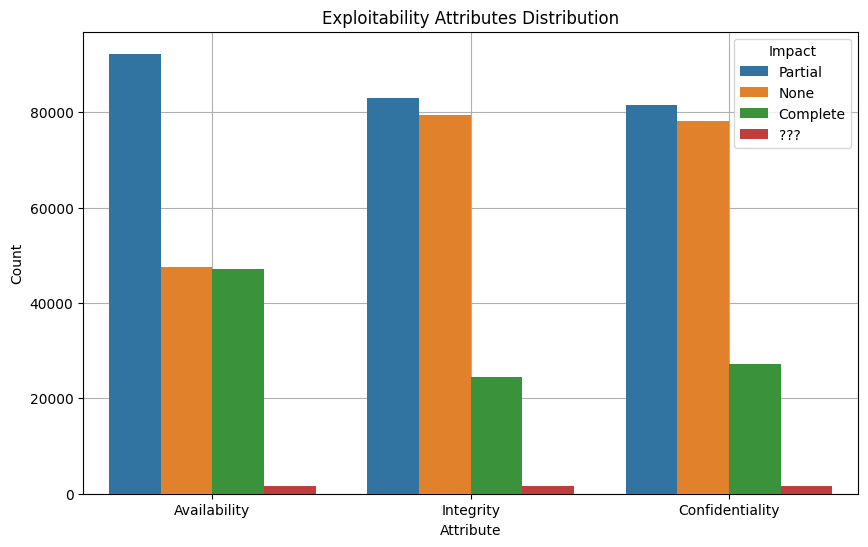

In [ ]:
# 1. CVSS Score Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Score"].dropna(), bins=20, kde=True, zorder=3)
plt.title("CVSS Score Distribution")
plt.xlabel("CVSS Score")
plt.ylabel("Frequency")
plt.grid(True, zorder=0)
plt.show()

# 2. Top CWE Categories
top_cwe = df["CWE ID"].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
plt.grid(True, zorder=0)
sns.barplot(x=top_cwe.index, y=top_cwe.values, zorder=3)
plt.title("Top 10 Most Common CWE IDs")
plt.xlabel("CWE ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Vulnerability Types (Top 10)
plt.figure(figsize=(8, 5))
top10 = df["Vulnerability Classification"].value_counts().nlargest(10)
top10.plot(kind='bar', zorder=3)
plt.title("Vulnerability Classification Distribution")
plt.xlabel("Classification")
plt.ylabel("Count")
plt.grid(True, zorder=0)
plt.xticks(rotation=45)
plt.show()

# 9. Complexity vs Score
plt.figure(figsize=(8, 5))
sns.boxplot(x="Complexity", y="Score", data=df, zorder=3)
plt.title("CVSS Score by Attack Complexity")
plt.xlabel("Complexity")
plt.ylabel("Score")
plt.grid(True, zorder=0)
plt.show()

# 10. Exploitability Attributes (Stacked)
exploit_df = df[["Availability", "Integrity", "Confidentiality"]].melt()
plt.figure(figsize=(10, 6))
sns.countplot(data=exploit_df, x="variable", hue="value", zorder=3)
plt.title("Exploitability Attributes Distribution")
plt.xlabel("Attribute")
plt.ylabel("Count")
plt.legend(title="Impact")
plt.grid(True, zorder=0)
plt.show()